# Feature Matching (SIFT)
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2024-03-08

Reference: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

<Figure size 960x480 with 0 Axes>

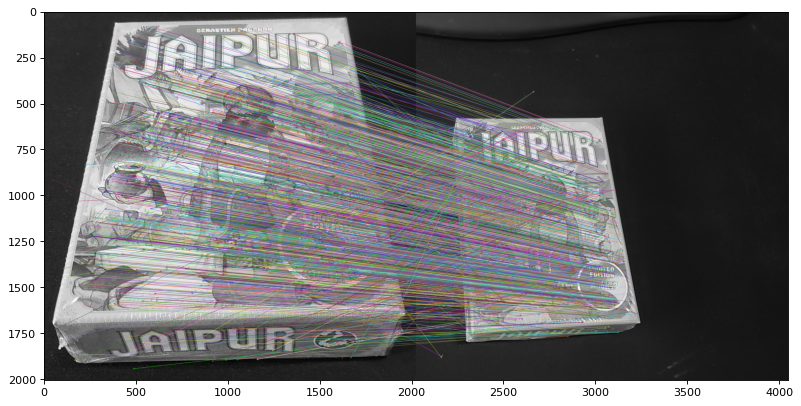

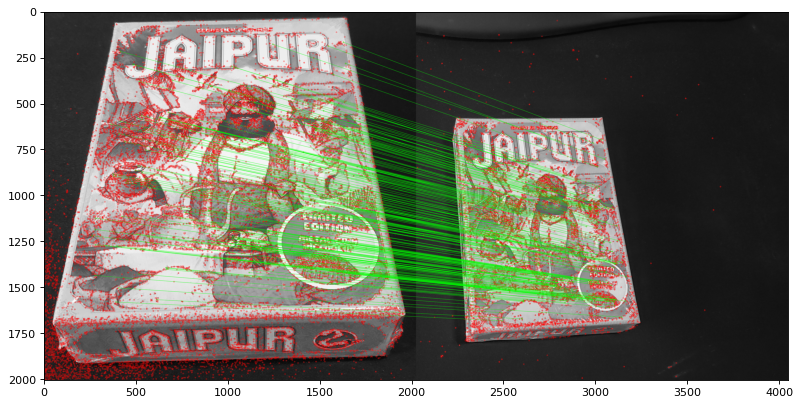

(<matplotlib.image.AxesImage at 0x1b7bd801450>, None)

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img1 = cv.imread('20201226_125213.jpg',cv.IMREAD_GRAYSCALE)     # queryImage
img2 = cv.imread('20201226_125222.jpg',cv.IMREAD_GRAYSCALE)     # trainImage
 
# Initiate SIFT detector
sift = cv.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

plt.figure(figsize=(12, 6), dpi=80)
kp_image = cv.drawKeypoints( img1, kp1, None, color=( 
    0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow('SIFT', kp_image),plt.show()
 
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6), dpi=80) 
plt.imshow(img3),plt.show()


# FLANN Matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
 
flann = cv.FlannBasedMatcher(index_params,search_params)
 
matches = flann.knnMatch(des1,des2,k=2)
 
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
 
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.5*n.distance:
        matchesMask[i]=[1,0]
 
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
 
img4 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
 
plt.figure(figsize=(12, 6), dpi=80)
plt.imshow(img4,),plt.show()